<a href="https://colab.research.google.com/github/Jin4041/BOJ/blob/main/chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mnist에 백색 잡음 픽셀과 0픽셀 추가

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images,train_labels), _ =mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
train_images_with_noise_channels=np.concatenate(
    [train_images, np.random.random((len(train_images),784))],axis=1)
train_images_with_zeros_channels=np.concatenate(
    [train_images, np.zeros((len(train_images),784))],axis=1)

11490434/11490434 [==============================] - 0s 0us/step


백색 잡음과 0 추가한 mnist 데이터에서 모델 훈련

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model=keras.Sequential([
      layers.Dense(512,activation="relu"),
      layers.Dense(10,activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [ ]:
model=get_model()
history_noise=model.fit(
    train_images_with_noise_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

moel=get_model()
history_zeros=model.fit(
    train_images_with_zeros_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 40ms/step - loss: 0.6037 - accuracy: 0.8115 - val_loss: 0.2495 - val_accuracy: 0.9247
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2533 - accuracy: 0.9213 - val_loss: 0.2239 - val_accuracy: 0.9317
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1624 - accuracy: 0.9501 - val_loss: 0.1620 - val_accuracy: 0.9512
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.1524 - val_accuracy: 0.9521
Epoch 5/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0850 - accuracy: 0.9730 - val_loss: 0.1372 - val_accuracy: 0.9606
Epoch 6/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.1268 - val_accuracy: 0.9632
Epoch 7/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.1126 - val_accuracy: 0.

검증 정확도 비교 그래프 그리기

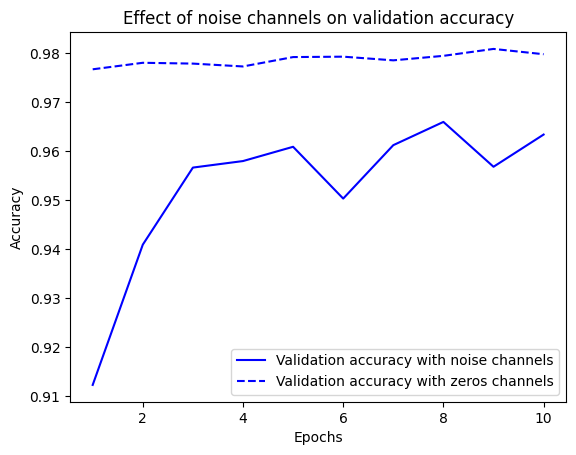

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise=history_noise.history["val_accuracy"]
val_acc_zeros=history_zeros.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs,val_acc_noise,"b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs,val_acc_zeros,"b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

홀드아웃 검증 구현 예

In [ ]:
num_validation_samples=100000
np.random.shuffle(data)
validation_data=data[:num_validation_samples]
training_data=data[num_validation_samples:]
model=get_model()
model.fit(training_data,...)
model=get_model()
model.fit(training_data,...)
model=get_model()
model.fit(training_data,...)
model=get_model()
model.fit(training_data,...)
model=get_model()
model.fit(np.concatenate([training_data,
                          validation_data]),...)
test_score=model.evaluate(test_data,...)

k-겹 교차 검증 구현 예

In [ ]:
k=3
num_validation_samples=len(data)//k
np.random.shuffle(data)
validation_score=[]
for fold in range(k):
  validation_data=data[num_validation_samples*fold:
                       num_validation_samples*(fold+1)]
  training_data=np.concatenate(
      data[:num_validation_samples*fold],
      data[num_validation_samples*(fold+1):])
  model=get_model()
  model.fit(training_data,...)
  validation_score=model.evaluate(validation_data,...)
  validation_score.append(validation_score)
  validation_score=np.average(validation_score)
model=get_model()
model.fit(data,...)
test_score=model.evaluate(test_data,...)

학습률 1.0으로 훈련

In [ ]:
(train_images,train_labels), _ =mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255

model=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(
  train_images_with_zeros_channels,train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 21ms/step - loss: 570.6828 - accuracy: 0.2962 - val_loss: 2.2800 - val_accuracy: 0.1937
Epoch 2/10
375/375 [==============================] - 15s 39ms/step - loss: 3.0659 - accuracy: 0.1897 - val_loss: 2.2592 - val_accuracy: 0.2083
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 2.7115 - accuracy: 0.1962 - val_loss: 2.3236 - val_accuracy: 0.1832
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 2.6987 - accuracy: 0.2243 - val_loss: 2.1498 - val_accuracy: 0.2586
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 2.4747 - accuracy: 0.2176 - val_loss: 2.2212 - val_accuracy: 0.2148
Epoch 6/10
375/375 [==============================] - 10s 26ms/step - loss: 2.3041 - accuracy: 0.2103 - val_loss: 2.0674 - val_accuracy: 0.1923
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 2.4342 - accuracy: 0.2030 - val_loss: 2.1268 - val_accuracy: 

학습률 1e-2로 훈련

In [ ]:
model=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(
  train_images_with_zeros_channels,train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 21ms/step - loss: 0.3483 - accuracy: 0.9132 - val_loss: 0.1804 - val_accuracy: 0.9497
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1280 - accuracy: 0.9650 - val_loss: 0.1212 - val_accuracy: 0.9692
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0954 - accuracy: 0.9745 - val_loss: 0.1502 - val_accuracy: 0.9655
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0784 - accuracy: 0.9799 - val_loss: 0.1607 - val_accuracy: 0.9718
Epoch 5/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0689 - accuracy: 0.9830 - val_loss: 0.1456 - val_accuracy: 0.9722
Epoch 6/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0551 - accuracy: 0.9853 - val_loss: 0.1829 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0507 - accuracy: 0.9875 - val_loss: 0.1759 - val_accuracy: 0.972

rogistic regression-smal-small model


In [ ]:
model=keras.Sequential([layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model=model.fit(
    train_images,train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.6659 - accuracy: 0.8394 - val_loss: 0.3580 - val_accuracy: 0.9042
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.9034 - val_loss: 0.3094 - val_accuracy: 0.9153
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9123 - val_loss: 0.2930 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9162 - val_loss: 0.2852 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.9183 - val_loss: 0.2784 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9206 - val_loss: 0.2751 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9218 - val_loss: 0.2740 - val_accuracy: 0.9250
Epoch 

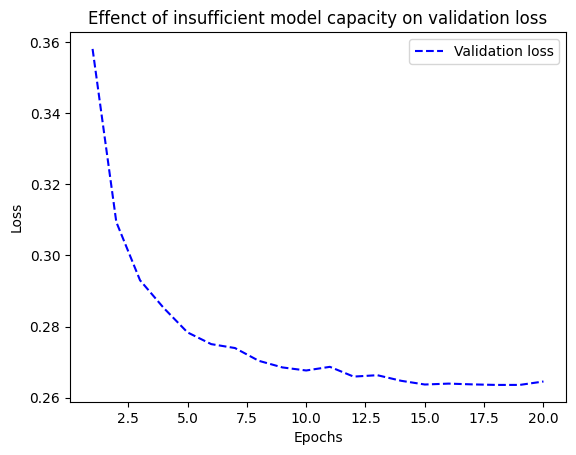

In [ ]:
import matplotlib.pyplot as plt

val_loss=history_small_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs,val_loss,"b--",
         label="Validation loss")
plt.title("Effenct of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

->과대적합하도록 모델 용량 늘리기

In [ ]:
model=keras.Sequential([
    layers.Dense(96,activation="relu"),
    layers.Dense(96,activation="relu"),
    layers.Dense(10,activation="softmax")
    ])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model=model.fit(
    train_images,train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3634 - accuracy: 0.8956 - val_loss: 0.1859 - val_accuracy: 0.9488
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1619 - accuracy: 0.9516 - val_loss: 0.1305 - val_accuracy: 0.9611
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1147 - accuracy: 0.9657 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.1156 - val_accuracy: 0.9652
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0700 - accuracy: 0.9788 - val_loss: 0.0953 - val_accuracy: 0.9732
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0953 - val_accuracy: 0.9727
Epoch 

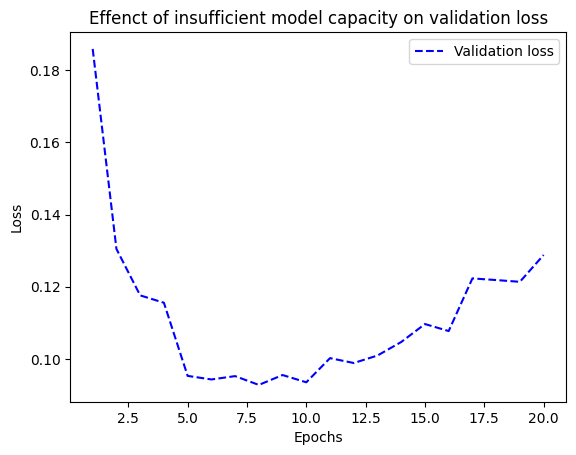

In [ ]:
import matplotlib.pyplot as plt

val_loss=history_small_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs,val_loss,"b--",
         label="Validation loss")
plt.title("Effenct of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

모델 규제하기-영화 리뷰 분류 모델

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),_=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequences in enumerate(sequences):
    results[i,sequences]=1.
  return results
train_data=vectorize_sequences(train_data)

model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original=model.fit(
    train_data,train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.5041 - accuracy: 0.7803 - val_loss: 0.3811 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3093 - accuracy: 0.8965 - val_loss: 0.3042 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2353 - accuracy: 0.9212 - val_loss: 0.2825 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1863 - accuracy: 0.9394 - val_loss: 0.2740 - val_accuracy: 0.8929
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1564 - accuracy: 0.9489 - val_loss: 0.3006 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1328 - accuracy: 0.9585 - val_loss: 0.3189 - val_accuracy: 0.8766
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1141 - accuracy: 0.9645 - val_loss: 0.3008 - val_accuracy: 0.8857
Epoch 8/20
30

더 작은 용량의 모델

In [ ]:
model=keras.Sequential([
    layers.Dense(4,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model=model.fit(
    train_data,train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.6325 - accuracy: 0.6519 - val_loss: 0.5716 - val_accuracy: 0.7327
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5272 - accuracy: 0.8165 - val_loss: 0.5026 - val_accuracy: 0.8164
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4524 - accuracy: 0.8777 - val_loss: 0.4468 - val_accuracy: 0.8557
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3880 - accuracy: 0.9062 - val_loss: 0.4078 - val_accuracy: 0.8553
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3305 - accuracy: 0.9277 - val_loss: 0.3712 - val_accuracy: 0.8659
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2809 - accuracy: 0.9377 - val_loss: 0.3277 - val_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2391 - accuracy: 0.9464 - val_loss: 0.3062 - val_accuracy: 0.8913
Epoch 8/20
30